PCA - Principal Component Analysis is a great tool to discover important relationship in the data and can also be used to create more informative features. 

Note : Chapeter 1,2 talk abt different way to combine (addition, subtraction, ratio, multiplication etc) PCA can help to discover what combination might result into a good feature.

Note : PCA Best Practises

1. PCA only works with neumerical features, like continues quantities or counts.
2. PCA is sensitive to scale its good practise to standardize the data before PCA.
3. Consider removing or constraining outliers before PCA since they can have undue influence on the result.






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("./data/abalone.csv")
features = ['Diameter', 'Height']
X = df.loc[:, features]

In [2]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [3]:
# hand removing the outlier , this is dirty there has to be a better way

X_scaled.sort_values(('Height'))


Diameter     Height
3996 -1.792437  -3.335554
1257 -0.684012  -3.335554
236  -3.555842  -3.096474
2169 -2.951246  -2.976934
1174  0.877860  -2.976934
...        ...        ...
1763  2.238201   2.641439
1428  2.439733   2.641439
2179  0.625945   2.641439
1417  1.583222   8.977051
2051 -0.532863  23.680452

[4177 rows x 2 columns]

In [4]:
# hand removing the outlier , this is dirty there has to be a better way

X_scaled = X_scaled.drop([1417, 2051])

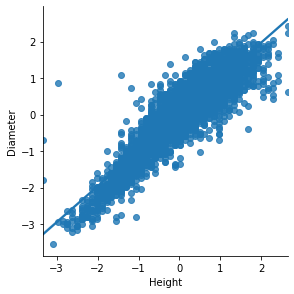

In [5]:
sns.lmplot(x="Height", y="Diameter",  height=4, aspect=1, data=X_scaled);

In [25]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(X_scaled[0:5])
print(X_pca[0:5])


   Diameter    Height
0 -0.432097 -1.064297
1 -1.439757 -1.183837
2  0.122116 -0.107978
3 -0.432097 -0.347058
4 -1.540523 -1.422916
[[ 1.03109262  0.48936391]
 [ 1.85603893 -0.1015093 ]
 [-0.02288804  0.15646428]
 [ 0.5476616  -0.04047225]
 [ 2.09162006  0.00718482]]


In [37]:
# PC data frame creation from above 2D metrics 
comp_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = comp_names, index=X_scaled.index)
X_pca[0:5]

PC1       PC2
0  1.031093  0.489364
1  1.856039 -0.101509
2 -0.022888  0.156464
3  0.547662 -0.040472
4  2.091620  0.007185

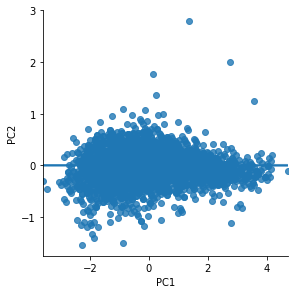

In [32]:
sns.lmplot(x=X_pca.columns[0], y=X_pca.columns[1],  height=4, aspect=1, data=X_pca);

In [40]:
pca.components_

array([[-0.73871623, -0.67401656],
       [ 0.67401656, -0.73871623]])

In [41]:
pd.DataFrame(pca.components_.T, columns=comp_names, index=X_scaled.columns )

PC1       PC2
Diameter -0.738716  0.674017
Height   -0.674017 -0.738716

# note : sum of weights*dimension != PC in this case why ?